In [1]:
import alc
import matplotlib.pyplot as plt
import numpy as np

### Cargar dataset

In [2]:
Xt, Yt, Xv, Yv = alc.cargarDataset("./cats_and_dogs")

### Descomposiciones

#### Cholesky

In [4]:
WCholesky = alc.algoritmo1(Xt, Yt)
MCholesky = WCholesky@Xv
confusionCholesky = alc.matrizConfusion(MCholesky, Yv)
confusionCholesky

Calculando LU para matriz de:  (1536, 2000)
Calculando LU para matriz de:  (1536, 1536)
Calculando LU para matriz de:  (1536, 1536)


array([[334., 166.],
       [150., 350.]])

#### Valores Singulares

In [3]:
WSVD = alc.algoritmo2(Xt, Yt) #, svdRango=20)
MSVD = WSVD@Xv
confusionSVD = alc.matrizConfusion(MSVD, Yv)
confusionSVD

svd_reducida es llamada desde algoritmo2


array([[334., 166.],
       [150., 350.]])

#### QR

##### Householder

In [5]:
WQR = alc.algoritmo3(Xt, Yt)
MQR = WQR@Xv
confusionQR = alc.matrizConfusion(MQR, Yv)
confusionQR

Calculando QR con HH
	Iteracion: 1535
pinvHouseHolder
	calculando vector: 1999
calculando W


array([[334., 166.],
       [150., 350.]])

##### Gram-Schmidt

In [6]:
WQR2 = alc.algoritmo3(Xt, Yt, metodo="GS")
MQR2 = WQR2@Xv
confusionQR2 = alc.matrizConfusion(MQR2, Yv)
confusionQR2

Calculando QR con GS no cuadrada
Calculando columna: 1535
pinvGramSchmidt
	calculando vector: 1999
calculando W


array([[334., 166.],
       [150., 350.]])

#### Tablas de aciertos por algoritmo

In [8]:
calificacionCh = alc.calcularPerformanceDeCalificacion(confusionCholesky)
calificacionSVD = alc.calcularPerformanceDeCalificacion(confusionSVD)
calificacionHH = alc.calcularPerformanceDeCalificacion(confusionQR)
calificacionGS = alc.calcularPerformanceDeCalificacion(confusionQR2)

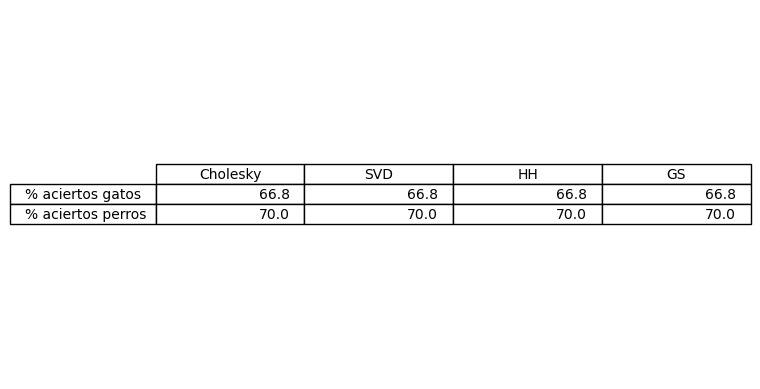

In [9]:
tabla = [
    [calificacionCh[0]*100, calificacionSVD[0]*100, calificacionHH[0]*100, calificacionGS[0]*100],
    [calificacionCh[1]*100, calificacionSVD[1]*100, calificacionHH[1]*100, calificacionGS[1]*100]
]

columnas = ["Cholesky", "SVD", "HH", "GS"]
filas = ["% aciertos gatos", "% aciertos perros"]

fig, ax = plt.subplots()
ax.axis('off')
t = ax.table(cellText=tabla,
                 colLabels=columnas,
                 rowLabels=filas,
                 loc='center')

t.auto_set_font_size(False)
t.set_fontsize(10)
t.scale(1.2, 1.2)

plt.show()

#### Matrices de predicción de cada método

In [10]:
MCholesky

array([[ 0.41073653,  1.02146944,  2.26842636, ..., -0.02216769,
        -0.37289573, -0.40202675],
       [ 0.57477739,  0.29731716, -1.0880363 , ...,  1.0876697 ,
         1.37626582,  0.95050597]], shape=(2, 1000))

In [11]:
MSVD

array([[ 0.41073652,  1.02146942,  2.26842638, ..., -0.0221676 ,
        -0.37289587, -0.40202678],
       [ 0.57477735,  0.29731716, -1.08803636, ...,  1.08766964,
         1.37626594,  0.95050599]], shape=(2, 1000))

In [12]:
MQR

array([[ 0.41073653,  1.02146944,  2.26842636, ..., -0.02216769,
        -0.37289573, -0.40202675],
       [ 0.57477739,  0.29731716, -1.0880363 , ...,  1.0876697 ,
         1.37626582,  0.95050597]], shape=(2, 1000))

In [13]:
MQR2

array([[ 0.41073653,  1.02146944,  2.26842636, ..., -0.02216769,
        -0.37289573, -0.40202675],
       [ 0.57477739,  0.29731716, -1.0880363 , ...,  1.0876697 ,
         1.37626582,  0.95050597]], shape=(2, 1000))

In [22]:
(MCholesky - MSVD) * 1000

array([[ 8.56905014e-06,  1.61208060e-05, -2.43169946e-05, ...,
        -9.07680586e-05,  1.42285323e-04,  2.82182004e-05],
       [ 3.26062711e-05, -5.29313515e-06,  6.13306472e-05, ...,
         6.11315332e-05, -1.18251517e-04, -2.33167755e-05]],
      shape=(2, 1000))

## Experimentacion

#### Tiempos de ejecución

Una vez implementados los algoritmos del TP intentamos correrlos para poder obtener las matrices de confusión pero nos topamos con un inconveniente, los calculos hechos por nuestros métodos
tardaban **mucho**.

Por ejemplo para ejecutar el algoritmo 1 entero estuvimos 1 hora 10 minutos aprox:

[foto si hay]

Para poder acelerar el proceso de experimentación realizamos un analisis de las ejecuciones y vimos que lo que más tardaba es nuestro metodo de multiplicar matrices:

[foto de esto]

Entonces reemplazamos nuestro multiplicar por el de numpy y vimos mejoras sustanciales:

[foto choelsky con numpy]

Sin embargo con el algoritmo 2 ocurrió que seguia tardando mucho, corriendolo con la multiplicación matricial de numpy tuvimos que limitar la cantidad de autovectores que calculamos y aún
así tardo 1 hora para calcular 20 autovectores (de 2000...):

[foto de valores sigulares]

Por este motivo para el calculo de svd con todos los autovectores decidimos usar el método de numpy que lo calcula.


#### Performance de clasificación de los algoritmos

Tras correr todos los algoritmos vimos que todas las matrices de confusión eran iguales, es decir ningún algoritmo era mejor clasificando gatos y perros. Analizando las matrices
de predicciones W*Xv vemos que son todas iguales excepto la calculada por SVD, que tiene errores acumulados que se reflejan en diferencias en el noveno o décimo dígito después de la coma,
aún asi este error es tán minimo que no afecta la clasificación.

#### Performance de ejecución

Dado que todos los metodos performan igual en la clasificación la principal diferencia que vimos fué en los tiempos de ejecución, vimos que en los experimentos los algoritmos más rápidos
son en orden: QR con Householder, QR con Gram-Schmidt, Cholesky y SVD con todos los autovectores.

Los dos algoritmos de QR se completan en alrededor de 13 minutos:

[foto]

El algoritmo de Cholesky tarda 30 minutos aproximadamente:

[foto]

Y el de SVD no pudimos correrlo entero pero en su versión limitada a calcular 20 autovectores tarda 1 hora aprox:

[foto]

Notar que todas las ejecuciones fueron con el método de multiplicar de numpy ya que el nuestro en el mejor caso duplicaba los tiempos de ejecución (y en peor "nunca" termina...)

#### Performance de clasificación SVD con autovectores limitados

Durante los experimentos por temas de velocidad creamos una versión alterada del método de svd que calcula una cantidad k de autovalores en logar de todos los posibles, probamos con 10
autovalores y nos dió la siguiente tabla de confusión:

|       |       |
|-------|-------|
| 312   | 188   |
| 280   | 220   |

Nos sorprendio que el resultado de clasificacion:
    62% de aciertos gatos, 44% de aciertos perros

No esta tan lejos de la clasificación del metodo svd con todos los autovectores (al menos en los gatos):
    66.8% de aciertos gatos, 70% de aciertos perros

Decidimos ver que tanto aportaba agregar autovactores al calculo y para eso realizamos el siguiente experimento, calcular todos los autovectores con el metodo de numpy de svd e ir armando
las matrices de confución correspondientes, terminando en el siguiente gráfico:

![Aciertos por Rango SVD](./imagenes/aciertosxrangoSVD.svg)

Notamos que a medida que agregamos autovectores va aumentando la performance de la clasificación pero esta performance tiene un máximo, alcanzado entre los 840 y 880 autovectores, después
del cuál la performance baja hasta converger a los valores de las tablas que mostraron los otros algortimos

Intentando razonar el por qué de estos sucesos, creemos que es por lo siguiente, si bien ir agregando autovectores proporciona más información, no todos los autovectores aportan
positivamente al performance, puede ocurrir que las características que capturan esos autovalores sean parecidas entre gatos y perros y eso tire abajo el porcentaje de aciertos.